In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
%store -r dataset_copy

In [3]:
dataset_final = dataset_copy.copy()
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30604 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30604 non-null  int64  
 1   job                   30604 non-null  object 
 2   marital               30604 non-null  object 
 3   education             30604 non-null  object 
 4   default               30604 non-null  object 
 5   housing               30604 non-null  object 
 6   loan                  30604 non-null  object 
 7   contact               30604 non-null  object 
 8   month                 30604 non-null  object 
 9   day_of_week           30604 non-null  object 
 10  duration              30604 non-null  int64  
 11  campaign              30604 non-null  int64  
 12  previously_contacted  30604 non-null  object 
 13  previous              30604 non-null  int64  
 14  emp.var.rate          30604 non-null  float64
 15  cons.conf.idx      

In [4]:
# For realistic output, drop duration column
# dataset_final.drop("duration", axis=1, inplace=True)

In [5]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30604 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30604 non-null  int64  
 1   job                   30604 non-null  object 
 2   marital               30604 non-null  object 
 3   education             30604 non-null  object 
 4   default               30604 non-null  object 
 5   housing               30604 non-null  object 
 6   loan                  30604 non-null  object 
 7   contact               30604 non-null  object 
 8   month                 30604 non-null  object 
 9   day_of_week           30604 non-null  object 
 10  duration              30604 non-null  int64  
 11  campaign              30604 non-null  int64  
 12  previously_contacted  30604 non-null  object 
 13  previous              30604 non-null  int64  
 14  emp.var.rate          30604 non-null  float64
 15  cons.conf.idx      

Changing timestamp into numerical data

In [6]:
# Changing the month column into timeframe
dataset_final["month"] = pd.to_datetime(dataset_final["month"], format="%b").dt.month
dataset_final["month"].value_counts().index

Int64Index([5, 7, 8, 6, 11, 4, 10, 9, 3, 12], dtype='int64')

In [7]:
'''
## Changing day_of_the_week into numerical data
* mon: 1
* tue: 2
* wed: 3
* thu: 4
* fri: 5
'''
# Encoding the day_of_week with numerical data
days_code = {
    "sun": 0,
    "mon": 1,
    "tue": 2,
    "wed": 3,
    "thu": 4,
    "fri": 5,
    "sat": 6
}
dataset_final['day_of_week'] = dataset_final['day_of_week'].map(days_code)
print(dataset_final['day_of_week'].value_counts().index)


Int64Index([4, 1, 3, 2, 5], dtype='int64')


In [8]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30604 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30604 non-null  int64  
 1   job                   30604 non-null  object 
 2   marital               30604 non-null  object 
 3   education             30604 non-null  object 
 4   default               30604 non-null  object 
 5   housing               30604 non-null  object 
 6   loan                  30604 non-null  object 
 7   contact               30604 non-null  object 
 8   month                 30604 non-null  int64  
 9   day_of_week           30604 non-null  int64  
 10  duration              30604 non-null  int64  
 11  campaign              30604 non-null  int64  
 12  previously_contacted  30604 non-null  object 
 13  previous              30604 non-null  int64  
 14  emp.var.rate          30604 non-null  float64
 15  cons.conf.idx      

# Outlier Treatment
There may exists an outlier in a dataset. For that, using interquartile range removing the outlier. The condition that must meet is, the datapoint must exists between
* lower_range = Q1 - 1.5 * inter_quartile_range
* higher_range = Q3 + 1.5 * inter_quartile_range

In [9]:
def remove_outlier(dataset: pd.DataFrame, column: str, strategy: str="mean") -> pd.DataFrame:
    column_data = dataset[column]

    # Calculation of quartiles
    Q1 = dataset[column].quantile(0.25)
    Q2 = dataset[column].quantile(0.5)
    Q3 = dataset[column].quantile(0.75)
    mean = dataset[column].mean()

    #inter quartile range
    iqr = Q3 - Q1

    # Calculation of lower and upper limit
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q3 + 1.5 * iqr

    # Detecting outliers
    outliers = dataset.loc[(column_data < lower_limit) | (column_data > upper_limit), column]
    outliers_density = len(outliers)/len(dataset)

    # Replacing the outlier with data wrt strategy mentioned
    if strategy == "median":
        dataset.loc[(column_data < lower_limit)|(column_data > upper_limit), column] = Q2
        
    elif strategy == "mean":
        dataset.loc[(column_data < lower_limit)|(column_data > upper_limit), column] = mean


    #plotting the plot with and without outliers
    def outlier_detection_plot():
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 10))

        # Box Plot
        # for box plot with outliers
        sns.boxplot(y=column_data, ax=ax1, color="red")
        ax1.set_title(column + '  '+ "Boxplot with Outliers")
        ax1.set_xlabel("Boxplot")
        ax1.set_ylabel("Values")

        # for box plot without outliers
        sns.boxplot(y=dataset[column], ax=ax2, color="green")
        ax2.set_title(column + '  ' + "Boxplot without Outliers")
        ax2.set_xlabel("Boxplot")
        ax2.set_ylabel("Values")

        # Histogram plot
        # for histogram with outliers
        sns.histplot(column_data, ax=ax3, color="red", kde=True)
        ax3.set_title(column + '  ' + "Histogram without Outliers")
        ax3.set_xlabel("Histogram")
        ax3.set_ylabel("Values")

        # for histogram without outliers
        sns.histplot(dataset[column], ax=ax4, color="blue", kde=True)
        ax4.set_title(column + '  ' + "Histogram with Outliers")
        ax4.set_xlabel("Histogram")
        ax4.set_ylabel("Values")

        plt.subplots_adjust(hspace=0.3)
        plt.show()
    
    outlier_detection_plot()
    
    return (dataset, outliers_density)

In [10]:
dataset_final.select_dtypes(include=np.number).columns.to_list()

['age',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.conf.idx']

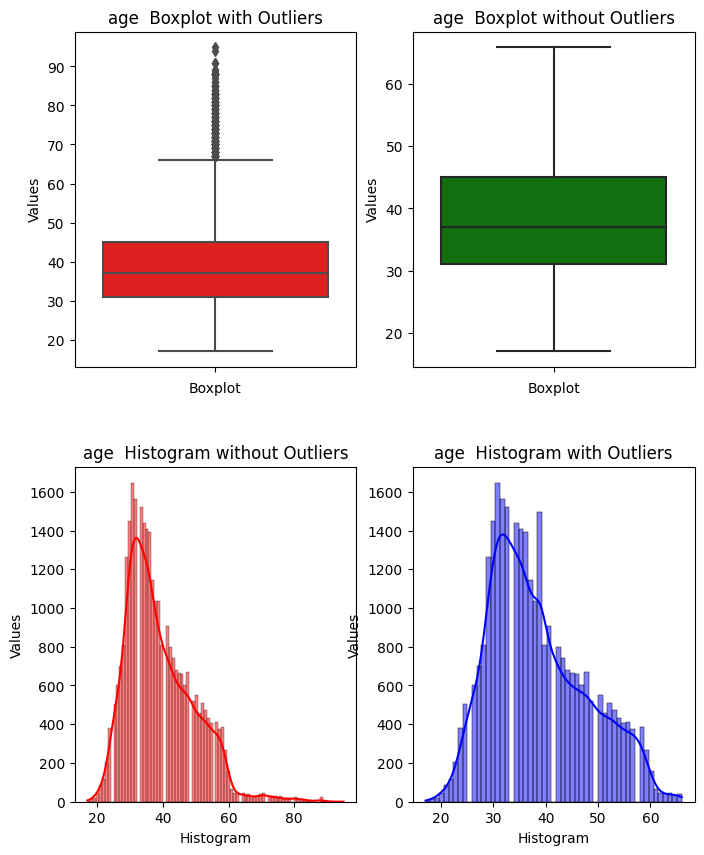

Outlier density: 0.01499803947196445


In [11]:
(dataset_final, outlier_density) = remove_outlier(dataset=dataset_final, column="age")
print(f"Outlier density: {outlier_density}")

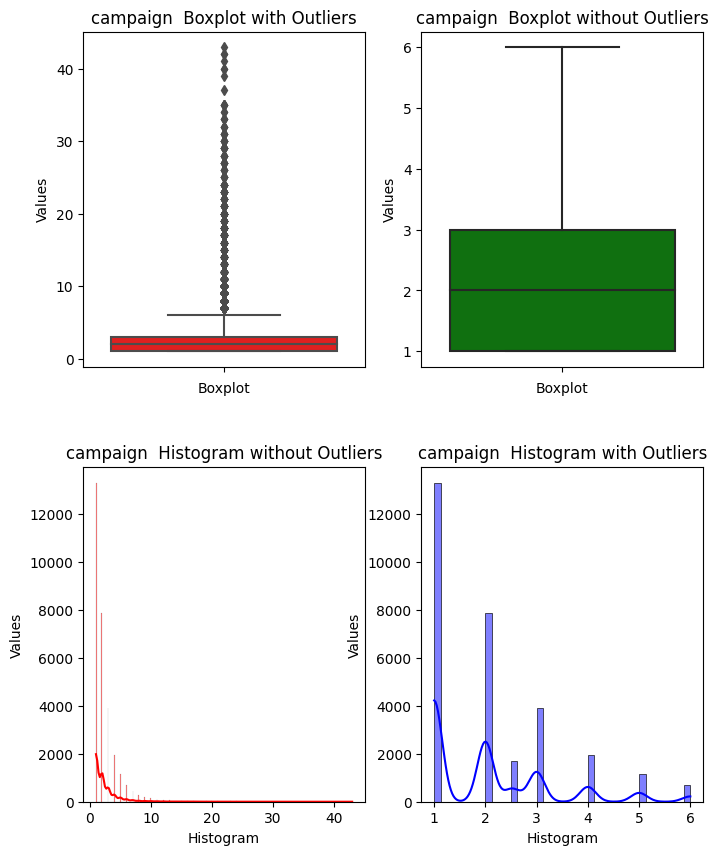

Outlier density: 0.05492746046268462


In [12]:
(dataset_final, outlier_density) = remove_outlier(dataset=dataset_final, column="campaign")
print(f"Outlier density: {outlier_density}")

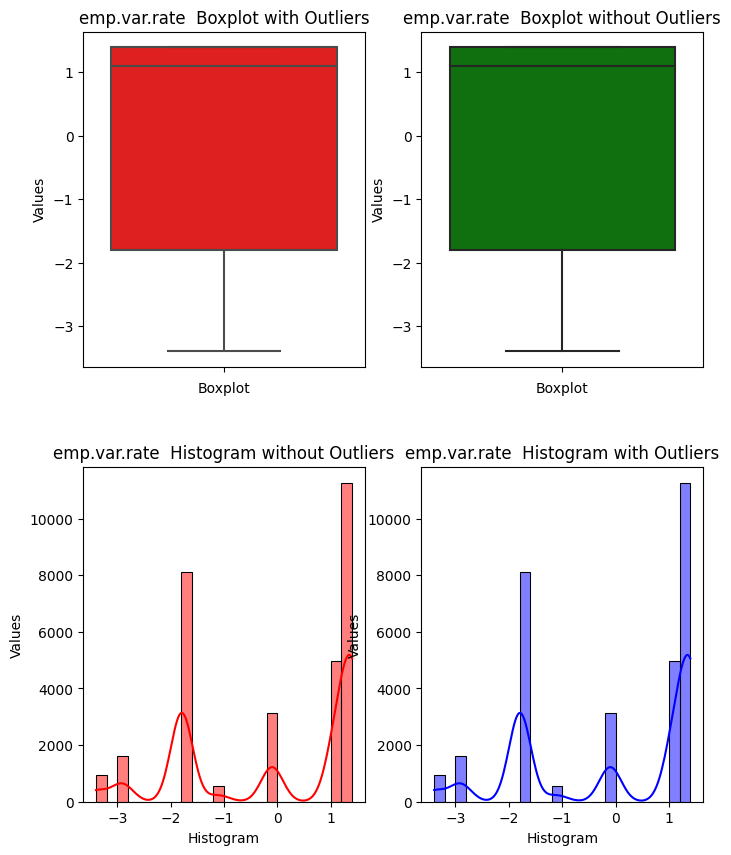

Outlier density: 0.0


In [13]:
(dataset_final, outlier_density) = remove_outlier(dataset=dataset_final, column="emp.var.rate")
print(f"Outlier density: {outlier_density}")

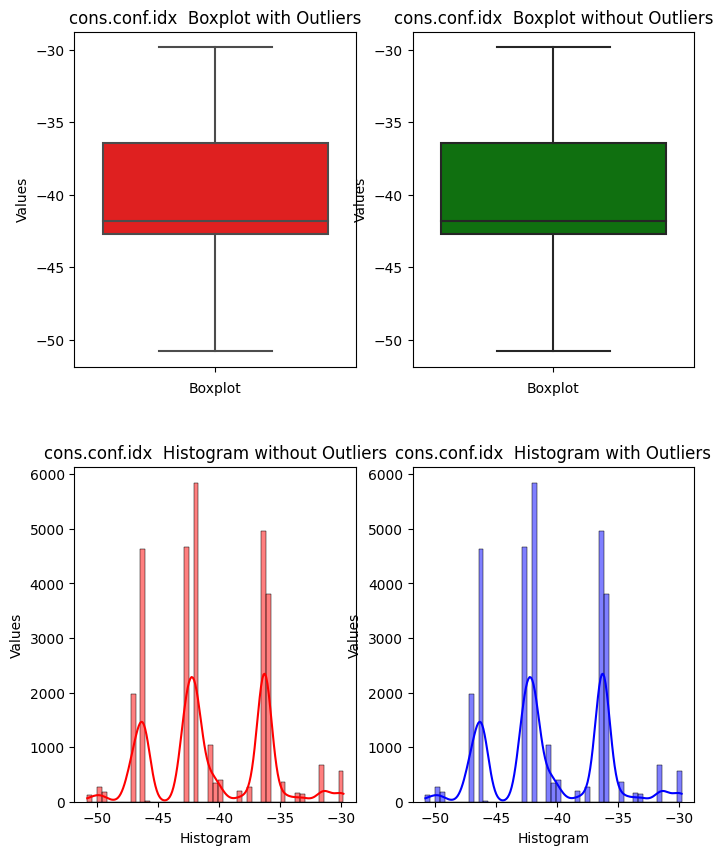

Outlier density: 0.013102862370931905


In [14]:
(dataset_final, outlier_density) = remove_outlier(dataset=dataset_final, column="cons.conf.idx")
print(f"Outlier density: {outlier_density}")

## Converting categorical variables into numeric

In [15]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30604 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30604 non-null  float64
 1   job                   30604 non-null  object 
 2   marital               30604 non-null  object 
 3   education             30604 non-null  object 
 4   default               30604 non-null  object 
 5   housing               30604 non-null  object 
 6   loan                  30604 non-null  object 
 7   contact               30604 non-null  object 
 8   month                 30604 non-null  int64  
 9   day_of_week           30604 non-null  int64  
 10  duration              30604 non-null  int64  
 11  campaign              30604 non-null  float64
 12  previously_contacted  30604 non-null  object 
 13  previous              30604 non-null  int64  
 14  emp.var.rate          30604 non-null  float64
 15  cons.conf.idx      

#### Conversion method
* job: label encoder
* education: label encoder
* marital: one hot encoder
* default: label encoder
* housing: label encoder
* loan: label encoder
* contact: label encoder
* previously_contacted: label encoder

In [16]:
categorical_one_hot_encoding = ["marital", "job", "education", "default", "housing", "loan", "contact", "previously_contacted"]
dataset_final_one_hot_encoded = pd.get_dummies(dataset_final[categorical_one_hot_encoding])

In [17]:
display(dataset_final_one_hot_encoded)

,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,previously_contacted_no,previously_contacted_yes
0,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
3,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0
6,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
41184,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
41185,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
41186,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [19]:
label_encoding_list = ["job", "education", "default", "housing", "loan", "contact", "previously_contacted"]
categorical_label_encoder = pd.DataFrame()
for column in label_encoding_list:
    categorical_label_encoder[column] = le.fit_transform(dataset_final[column])

dataset_final_label_encoded = pd.DataFrame(categorical_label_encoder.copy())

In [20]:
print(categorical_label_encoder["job"].nunique())
print(categorical_label_encoder["job"].unique())
print(categorical_label_encoder["job"].value_counts())

12
[ 3  7  0  9  1 10  5  2  4  8  6 11]
0     8737
1     5675
9     5473
7     2857
4     2311
5     1216
6     1092
2     1089
10     738
3      690
8      610
11     116
Name: job, dtype: int64


In [21]:
print(categorical_label_encoder["education"].nunique())
print(categorical_label_encoder["education"].unique())
print(categorical_label_encoder["education"].value_counts())

7
[0 3 1 5 2 6 4]
6    10450
3     7705
5     4329
2     4298
0     2409
1     1402
4       11
Name: education, dtype: int64


In [22]:
dataset_final_numerical = dataset_final.select_dtypes(include=np.number)
dataset_final_numerical

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.conf.idx
0,56.000000,5,1,261,1.0,0,1.1,-36.4
2,37.000000,5,1,226,1.0,0,1.1,-36.4
3,40.000000,5,1,151,1.0,0,1.1,-36.4
4,56.000000,5,1,307,1.0,0,1.1,-36.4
6,59.000000,5,1,139,1.0,0,1.1,-36.4
...,...,...,...,...,...,...,...,...
41183,39.042021,11,5,334,1.0,0,-1.1,-50.8
41184,46.000000,11,5,383,1.0,0,-1.1,-50.8
41185,56.000000,11,5,189,2.0,0,-1.1,-50.8
41186,44.000000,11,5,442,1.0,0,-1.1,-50.8


In [23]:
# Encoding the output with numerical data
output_encode = {
    "no": 0,
    "yes": 1,
}
dataset_final_output = dataset_final["y"].map(output_encode)
dataset_final_output.shape

(30604,)

In [24]:
dataset_final_numerical.shape

(30604, 8)

In [25]:
dataset_final_label_encoded.shape

(30604, 7)

In [26]:
dataset_final_one_hot_encoded.shape

(30604, 32)

In [27]:
dataset_final_output.shape

(30604,)

In [28]:
dataset_final_encoded = pd.concat([dataset_final_numerical, dataset_final_one_hot_encoded, dataset_final_output], axis=1)
dataset_final_encoded

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.conf.idx,marital_divorced,marital_married,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,previously_contacted_no,previously_contacted_yes,y
0,56.000000,5,1,261,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
2,37.000000,5,1,226,1.0,0,1.1,-36.4,0,1,...,0,0,1,1,0,0,1,1,0,0
3,40.000000,5,1,151,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
4,56.000000,5,1,307,1.0,0,1.1,-36.4,0,1,...,0,1,0,0,1,0,1,1,0,0
6,59.000000,5,1,139,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,39.042021,11,5,334,1.0,0,-1.1,-50.8,0,1,...,0,0,1,1,0,1,0,1,0,1
41184,46.000000,11,5,383,1.0,0,-1.1,-50.8,0,1,...,0,1,0,1,0,1,0,1,0,0
41185,56.000000,11,5,189,2.0,0,-1.1,-50.8,0,1,...,0,0,1,1,0,1,0,1,0,0
41186,44.000000,11,5,442,1.0,0,-1.1,-50.8,0,1,...,0,1,0,1,0,1,0,1,0,1


In [29]:
dataset_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30604 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30604 non-null  float64
 1   month                          30604 non-null  int64  
 2   day_of_week                    30604 non-null  int64  
 3   duration                       30604 non-null  int64  
 4   campaign                       30604 non-null  float64
 5   previous                       30604 non-null  int64  
 6   emp.var.rate                   30604 non-null  float64
 7   cons.conf.idx                  30604 non-null  float64
 8   marital_divorced               30604 non-null  uint8  
 9   marital_married                30604 non-null  uint8  
 10  marital_single                 30604 non-null  uint8  
 11  job_admin.                     30604 non-null  uint8  
 12  job_blue-collar                30604 non-null 

In [30]:
dataset_final_encoded.isna().any()

age                              False
month                            False
day_of_week                      False
duration                         False
campaign                         False
previous                         False
emp.var.rate                     False
cons.conf.idx                    False
marital_divorced                 False
marital_married                  False
marital_single                   False
job_admin.                       False
job_blue-collar                  False
job_entrepreneur                 False
job_housemaid                    False
job_management                   False
job_retired                      False
job_self-employed                False
job_services                     False
job_student                      False
job_technician                   False
job_unemployed                   False
job_unknown                      False
education_basic.4y               False
education_basic.6y               False
education_basic.9y       

In [31]:
%store dataset_final_encoded

Stored 'dataset_final_encoded' (DataFrame)
